In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [7]:
#The code in this cell reads from the feature_engineering_analysis.txt file and aggregates the information into dictionaries for plotting and analysis.

import os
from collections import Counter
import ast

list_of_dicts = []

def parse_line(in_line: str):
    pandas_func= []
    imports= []
    from_imports= []
    
    axis_string = in_line[in_line.find('axis_0:'):]
    axis_0_calls = int(axis_string.split(',')[0][7:])
    axis_1_calls = int(axis_string.split(',')[1][9:])
    dict_import_string = in_line[in_line.find('Dict:'):in_line.find('}')+1][5:]
    try:
        dict_import =  ast.literal_eval(dict_import_string)
    except:
        dict_import = {}
    pandas_func= in_line[in_line.find('['): in_line.find(']')]
    pandas_func= pandas_func[2:-1].split("', '")
    in_line= in_line[in_line.find(']'):][2:]
    
    imports= in_line[in_line.find('['): in_line.find(']')]
    imports= imports[2:-2].split("', '")
    
    in_line= in_line[in_line.find(']'):][2:]
    
    from_imports= in_line[in_line.find('['): in_line.find(']')]
    from_imports= from_imports[2:-2].split("', '")
    
    return (pandas_func, imports, from_imports, dict_import, axis_0_calls, axis_1_calls)
    
pandas_occ = []
import_occ = []
from_occ = []
imp_dicts = []

overlap = {}

count_non_panda = 0
script_count = 0
axis_0_calls = 0
axis_1_calls = 0
with open('feature_engineering_analysis.txt', "r") as source:
    for line in source:
        script_count += 1
        pa, im, fro, imp, ax0, ax1 = parse_line(line)
        pandas_occ.append(pa)
        import_occ.append(set(im))
        from_occ.append(fro)
        imp_dicts.append(imp)
        axis_0_calls += ax0
        axis_1_calls += ax1
        


for item in imp_dicts:
    for key in item.keys():
        overlap[key] = []

for dict_funct in imp_dicts:
    for key, value in dict_funct.items():
        overlap[key].append(value)

overlap_single = {}
overlap_count = {}
for key , value in overlap.items():
    overlap_single[key] = Counter([x for xs in value for x in list(set(xs))])
    overlap_count[key] = Counter([x for xs in value for x in list(set(xs))])
    

for key, value in overlap_single.items():
    overlap_single[key] = sum(value.values())

#all potential pandas functions, when counted a single time per notebook
pandas_single= Counter([x for xs in pandas_occ for x in list(set(xs))])
#all potential pandas functions, when counted multiple times per notebook
pandas_count = Counter([x for xs in pandas_occ for x in xs])

import_single=Counter([x for xs in import_occ for x in list(set(xs))])
import_count = Counter([x for xs in import_occ for x in xs])

from_single=Counter([x for xs in from_occ for x in list(set(xs))])
from_count = Counter([x for xs in from_occ for x in xs])


In [10]:
#Some basic stats about the notebooks

total_pandas_calls = 0
for key, value in pandas_count.items():
    total_pandas_calls += value
    
total_pandas_calls_single = 0
for key, value in pandas_single.items():
    total_pandas_calls_single += value

print("Axis_0_calls: ", str(axis_0_calls), ", Axis_1_calls: ", str(axis_1_calls))
print("Total_pandas_calls: ", str(total_pandas_calls))
print("Total_pandas_calls_single: ", str(total_pandas_calls_single))

pandas_count = dict(sorted(pandas_count.items(), key=lambda item: item[1]))
functions = list(reversed(list(pandas_count.keys())))
occurances = list(reversed(list(pandas_count.values())))


Axis_0_calls:  1735 , Axis_1_calls:  9024
Total_pandas_calls:  154884
Total_pandas_calls_single:  41771


In [11]:
print("Notebooks without Pandas module: " , str(import_count['pandas']), "/", str(script_count))

Notebooks without Pandas module:  2061 / 2177


['read_csv', 'head', 'to_csv', 'drop', 'mean', 'sum', 'astype', 'concat', 'groupby', 'fillna', 'reset_index', 'sort_values', 'apply', 'transform', 'copy', 'value_counts', 'join', 'unique', 'isnull', 'max', 'map', 'corr', 'std', 'merge', 'min', 'describe', 'replace', 'info', 'array', 'median', 'get_dummies', 'rename', 'isna', 'agg', 'nunique', 'count', 'isin', 'hist', 'boxplot', 'abs', 'set_index', 'dropna', 'to_datetime', 'round', 'items', 'where', 'keys', 'mode', 'select_dtypes', 'clip', 'tail', 'sample', 'shift', 'memory_usage', 'update', 'any', 'diff', 'drop_duplicates', 'to_dict', 'skew', 'transpose', 'quantile', 'rolling', 'cumsum', 'cut', 'query', 'get', 'notnull', 'pop', 'sort_index', '__init__', 'crosstab', 'factorize', 'duplicated', 'add', 'iterrows', 'read_parquet', 'eval', 'squeeze', 'unstack', 'sub', 'to_numpy', 'qcut', 'stack', 'pivot_table', 'melt', 'assign', 'filter', 'var', 'nlargest', 'kurt', 'bool', 'pivot', 'kurtosis', 'read_pickle', 'ffill', 'to_numeric', 'rank', 't

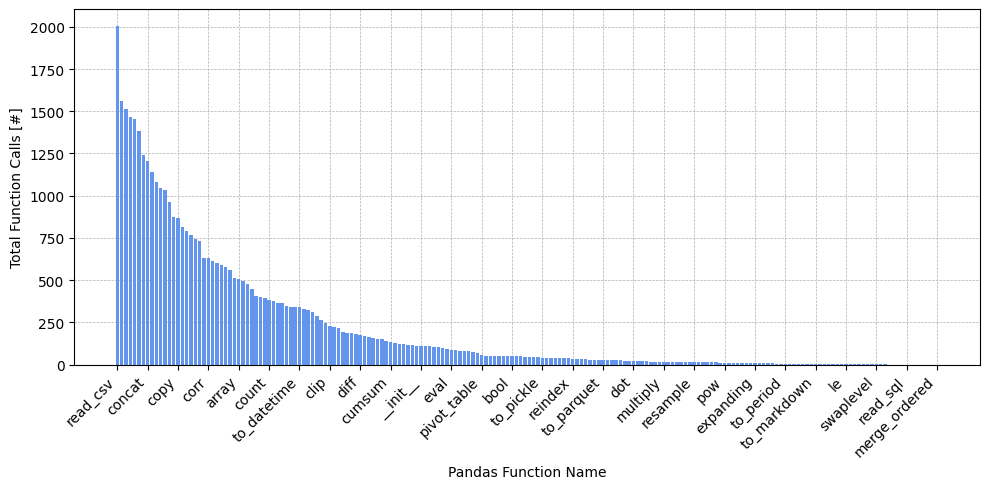

In [13]:
#This cell is used to construct the graphs used in the Thesis
#Set SINGLE=True if you want to analyse the data where occurance is counted a single time per notebook and SINGLE=False for it to count occurance multiple times
#Set CREATE_TOP=True to only plot the highest 25 occuring funcitons


import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plot 
SINGLE = True
if SINGLE:
    pandas_single = dict(sorted(pandas_single.items(), key=lambda item: item[1]))
    functions = list(pandas_single.keys())
    occurances = list(pandas_single.values())
else:
    pandas_single = dict(sorted(pandas_count.items(), key=lambda item: item[1]))
    functions = list(pandas_count.keys())
    occurances = list(pandas_count.values())

functions.reverse()
occurances.reverse()
print(functions)    
    
fig, ax = plt.subplots(figsize = (10, 5))

CREATE_TOP = False
if CREATE_TOP:
    amount = 25
    plt.bar(functions[:amount], occurances[:amount], color ='cornflowerblue', width = 0.4)
    
else:
    plt.bar(functions, occurances, color ='cornflowerblue')
    amount = 25
if SINGLE:
    plt.xlabel("Pandas Function Name")
    plt.ylabel("Total Function Calls [#]")
else:
    plt.xlabel("Pandas Function Name")
    plt.ylabel("Total Function Calls [#]")
#plt.title("Number of notebooks the function is included")
ticks = ax.get_xticks()
labels = ax.get_xticklabels()
n = len(ticks) // amount # Show 10 ticks.
ax.set_xticks(ticks[::n])
ax.set_xticklabels(labels[::n])
ax.set_axisbelow(True)
ax.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=3)
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.1)
plt.tight_layout()
plt.savefig(f"25_pandas.pdf")


([<matplotlib.patches.Wedge at 0x74748ebdc160>,
 [Text(1.0909466061696542, 0.14083856888975227, 'copy'),
  Text(1.0191191904286734, 0.4140000914251174, 'concat'),
  Text(0.8773225510991693, 0.66355492714081, 'value_counts'),
  Text(0.6701034889431731, 0.8723309659218724, 'count'),
  Text(0.4084854901504121, 1.0213420603972883, 'transform'),
  Text(0.0774753352914584, 1.0972682317562448, 'reset_index'),
  Text(-0.3334531026608487, 1.0482409209365249, 'fillna'),
  Text(-0.7298948399538794, 0.8229541436852366, 'apply'),
  Text(-1.013650304367195, 0.4272154731002764, 'sum'),
  Text(-1.0955247089082636, -0.09912422595644518, 'read_csv'),
  Text(-0.9009636910256869, -0.6310819498713068, 'head'),
  Text(-0.45098748392965504, -1.003299700657186, 'mean'),
  Text(0.1331146298232407, -1.0919159744811053, 'astype'),
  Text(0.6876264852989926, -0.8585859402036319, 'drop'),
  Text(1.0482471491701266, -0.3334335229947682, 'groupby')],
 [Text(0.5950617851834478, 0.0768210375762285, '4.1%\n'),
  Text(0

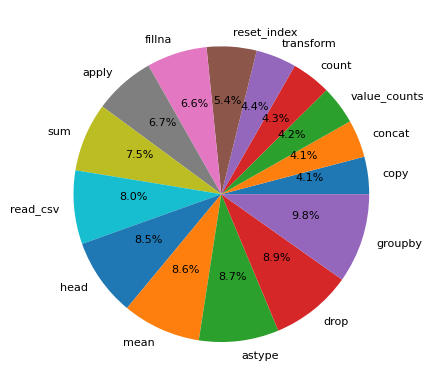

In [16]:
import matplotlib.pyplot as plt
import sys, os

def my_fmt(x):
    return '{:.1f}%\n'.format(x,100 * float(x)/float(sum(pandas_count.values())))


pandas_top = list(pandas_count)[-15:]

labels = list(pandas_top)
sizes = []
for item in pandas_top:
    sizes.append(pandas_count[item])

fig, ax = plt.subplots()

ax.pie(sizes, labels=labels,  autopct=my_fmt, textprops={'fontsize': 8})


([<matplotlib.patches.Wedge at 0x74748235e680>,
 [Text(1.068035996798755, 0.26324724033138536, 'fillna'),
  Text(0.8131728580185198, 0.7407765540174664, 'groupby'),
  Text(0.3327073738951233, 1.0484778506748775, 'concat'),
  Text(-0.2605006377626801, 1.0687092297370866, 'astype'),
  Text(-0.8081865842914896, 0.7462134044435648, 'sum'),
  Text(-1.0932175019674428, 0.12196513186999135, 'mean'),
  Text(-0.9421535347271107, -0.5677558603847356, 'drop'),
  Text(-0.3896053769794451, -1.0286922038339286, 'to_csv'),
  Text(0.3516375542251175, -1.0422816464174056, 'head'),
  Text(0.9913399945878454, -0.4767022289968559, 'read_csv')],
 [Text(0.5825650891629571, 0.14358940381711927, '7.7%\n'),
  Text(0.4435488316464653, 0.4040599385549816, '8.1%\n'),
  Text(0.18147674939733996, 0.571897009459024, '8.6%\n'),
  Text(-0.14209125696146185, 0.5829323071293199, '8.8%\n'),
  Text(-0.44082904597717615, 0.4070254933328535, '9.8%\n'),
  Text(-0.5963004556186051, 0.06652643556544982, '10.4%\n'),
  Text(-0.5

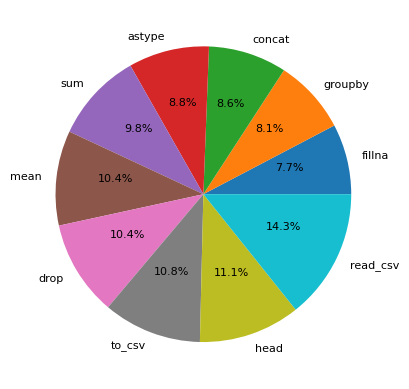

In [17]:
import matplotlib.pyplot as plt
import sys, os

def my_fmt(x):
    return '{:.1f}%\n'.format(x,100 * float(x)/float(sum(pandas_single.values())))


pandas_top = list(pandas_single)[-10:]

labels = list(pandas_top)
sizes = []
for item in pandas_top:
    sizes.append(pandas_single[item])

fig, ax = plt.subplots()

ax.pie(sizes, labels=labels,  autopct=my_fmt, textprops={'fontsize': 8})


In [18]:
print(pandas_count['map'])

2713


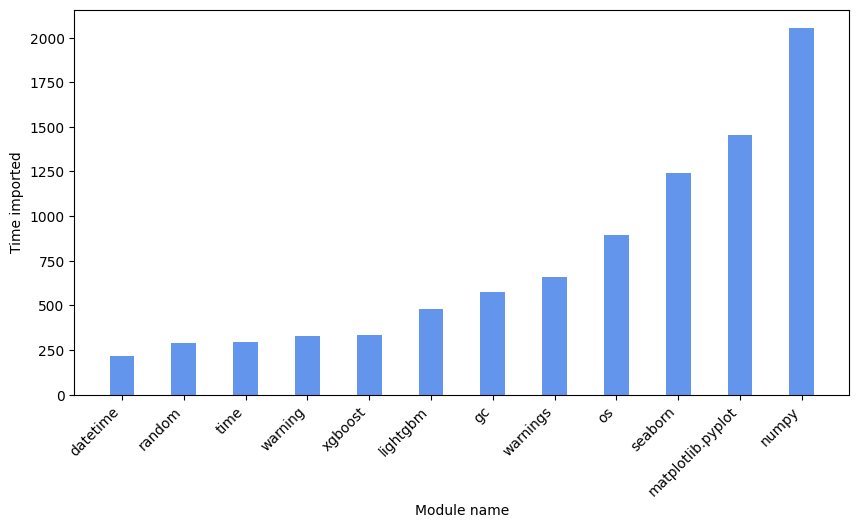

In [19]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plot 
  
import_count = dict(sorted(import_count.items(), key=lambda item: item[1]))
import_count.pop('pandas')
functions = list(import_count.keys())[-12:]
occurances = list(import_count.values())[-12:]
  
fig, ax = plt.subplots(figsize = (10, 5))
 
# creating the bar plot

plt.bar(functions, occurances, color ='cornflowerblue', width = 0.4)
 
plt.xlabel("Module name")
plt.ylabel("Time imported")
#plt.title("Occurances of other imports functions")
ticks = ax.get_xticks()
labels = ax.get_xticklabels()
n = len(ticks) // 12  # Show 10 ticks.
ax.set_xticks(ticks[::n])
ax.set_xticklabels(labels[::n])
plt.xticks(rotation=45, ha='right')
plt.show()

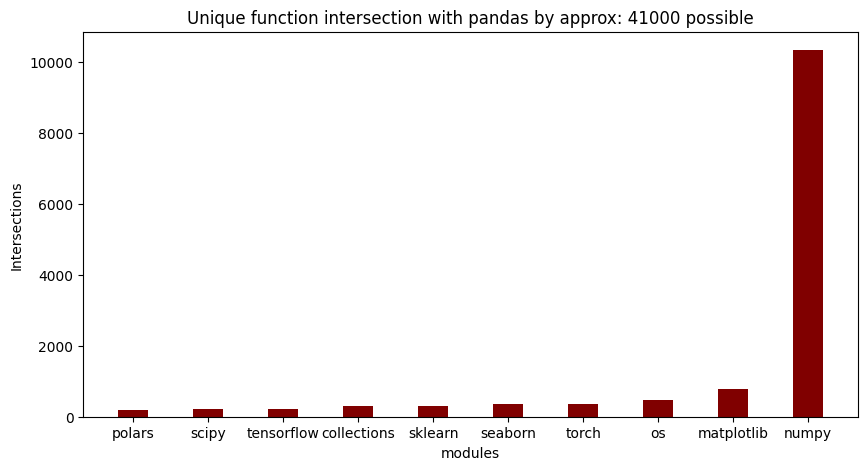

In [13]:
overlap_single_copy = overlap_single.copy()
overlap_single_copy = dict(sorted(overlap_single_copy.items(), key=lambda item: item[1]))
overlap_single_copy.pop('pandas')
functions = list(overlap_single_copy.keys())[-10:]
occurances = list(overlap_single_copy.values())[-10:]
  
fig, ax = plt.subplots(figsize = (10, 5))
 
# creating the bar plot

plt.bar(functions, occurances, color ='maroon', 
        width = 0.4)
 
plt.xlabel("modules")
plt.ylabel("Intersections")
plt.title("Unique function intersection with pandas by approx: 41000 possible")
ticks = ax.get_xticks()
labels = ax.get_xticklabels()
n = len(ticks) // 10 # Show 10 ticks.
ax.set_xticks(ticks[::n])
ax.set_xticklabels(labels[::n])
plt.show()

In [14]:
print(overlap_count['numpy'])

Counter({'mean': 1389, 'sum': 1314, 'copy': 828, 'unique': 726, 'max': 695, 'std': 593, 'min': 561, 'info': 490, 'array': 480, 'median': 476, 'isin': 355, 'abs': 332, 'round': 318, 'where': 294, 'clip': 220, 'any': 172, 'diff': 164, 'quantile': 148, 'transpose': 141, 'cumsum': 125, 'add': 101, 'squeeze': 80, 'stack': 61, 'var': 49, 'insert': 40, 'all': 34, 'product': 28, 'divide': 18, 'multiply': 18, 'dot': 16, 'subtract': 14, 'cumprod': 12, 'pad': 10, 'take': 10, 'test': 10, 'mod': 8, 'prod': 5, 'cov': 2, '__init__': 1, 'sample': 1})


In [15]:
print("Axis_0_calls: ", str(axis_0_calls), ", Axis_1_calls: ", str(axis_1_calls))
print("Total_pandas_calls: ", str(total_pandas_calls))
print("Total_pandas_calls_single: ", str(total_pandas_calls_single))
print("Definitiv axis calls: ", str(axis_1_calls), "/", str(total_functions_with_axis))

Axis_0_calls:  1735 , Axis_1_calls:  9024
Total_pandas_calls:  154884
Total_pandas_calls_single:  41771
Definitiv axis calls:  9024 / 0
